In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [9]:
import pandas as pd
titanic_train = pd.read_csv('train.csv', index_col = 0)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

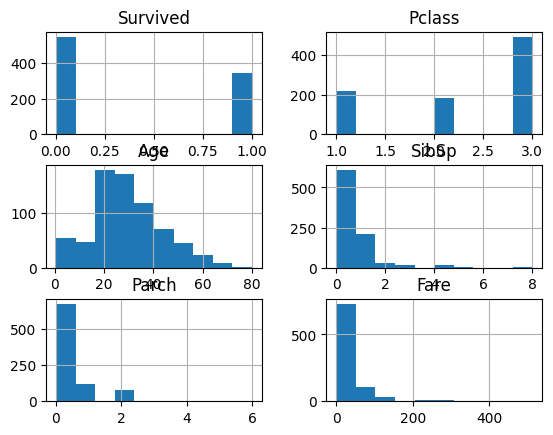

In [10]:
titanic_train.hist()

In [11]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Criando a coluna Family, que é a quantidade total de parentes a bordo

In [12]:
titanic_train['Family'] = titanic_train.Parch + titanic_train.SibSp

Criando a coluna Is_Alone, que indica se uma pessoa está viajando sozinha

In [13]:
titanic_train['Is_Alone'] = titanic_train.Family == 0

Verificando quais colunas têm valores faltantes

In [14]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Family        0
Is_Alone      0
dtype: int64

Preenchendo os valores faltantes da coluna Embarked com a moda da coluna Embarked

In [15]:
titanic_train.Embarked.fillna(titanic_train.Embarked.mode()[0], inplace = True)

Preenchendo os valores faltantes da coluna Cabin com 'NA', que representa uma nova classe

In [16]:
titanic_train.Cabin = titanic_train.Cabin.fillna('NA')

Preenchendo os valores faltantes da coluna Age

Para isso, separamos as pessoas em grupos de acordo com o sexo e a classe social

A estimativa da idade da pessoa será a mediana do grupo a que pertence

In [17]:
grp_age = titanic_train.groupby(['Sex', 'Pclass'])
grp_age.Age.describe()

count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [18]:
grp_age.Age.apply(lambda x: x.fillna(x.median()))

<ipython-input-18-23781664d32e>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grp_age.Age.apply(lambda x: x.fillna(x.median()))


PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
titanic_train.Age.fillna(titanic_train.Age.median(), inplace = True)

Convertendo as variáveis Sex e Is_Alone em variáveis numéricas

In [20]:
from sklearn.preprocessing import LabelEncoder
titanic_train['Sex'] = LabelEncoder().fit_transform(titanic_train['Sex'])
titanic_train['Is_Alone'] = LabelEncoder().fit_transform(titanic_train['Is_Alone'])

Usando a função get_dummies para transformar uma variável categórica (Embarked) em variáveis dummy

In [21]:
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked'])

In [22]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family,Is_Alone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,0,1,0,0,1


Removendo as colunas que não usaremos

In [23]:
titanic_train.drop(['Cabin','Name', 'Ticket'], axis=1, inplace=True)

In [24]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,0,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,1,0,0,1
4,1,1,0,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,1,0,0,1


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'Is_Alone'}>],
       [<Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>,
        <Axes: title={'center': 'Embarked_S'}>]], dtype=object)

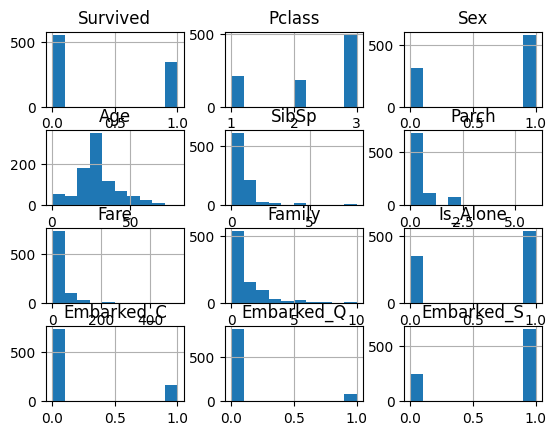

In [25]:
titanic_train.hist()

In [26]:
titanic_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Is_Alone,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.904602,0.602694,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000


**Treinando o modelo**

In [27]:
X_train, X_val, y_train, y_val = train_test_split(titanic_train.values[:,1:], titanic_train.values[:,0], test_size=0.2, stratify=titanic_train.values[:,0], random_state=42)

In [28]:
dt_titanic = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt_titanic.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

A acurácia do modelo foi 0.7597765363128491 usando os dados de validação

In [29]:
y_pred = dt_titanic.predict(X_val)
accuracy_score(y_val, y_pred)

0.7597765363128491

Calculando o relatório de métricas 

In [30]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       110
         1.0       0.74      0.58      0.65        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.76      0.76      0.75       179



Exibindo a árvore de decisão criada

[Text(0.4868421052631579, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.28289473684210525, 0.75, 'x[0] <= 2.5\ngini = 0.382\nsamples = 253\nvalue = [65, 188]'),
 Text(0.13157894736842105, 0.5833333333333334, 'x[5] <= 28.856\ngini = 0.097\nsamples = 137\nvalue = [7, 130]'),
 Text(0.07894736842105263, 0.4166666666666667, 'x[5] <= 28.231\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.05263157894736842, 0.25, 'x[2] <= 56.0\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.02631578947368421, 0.08333333333333333, 'gini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18421052631578946, 0.4166666666666667, 'x[6] <= 2.5\ngini = 0.024\nsamples = 83\nvalue = [1, 82]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.2105263157894

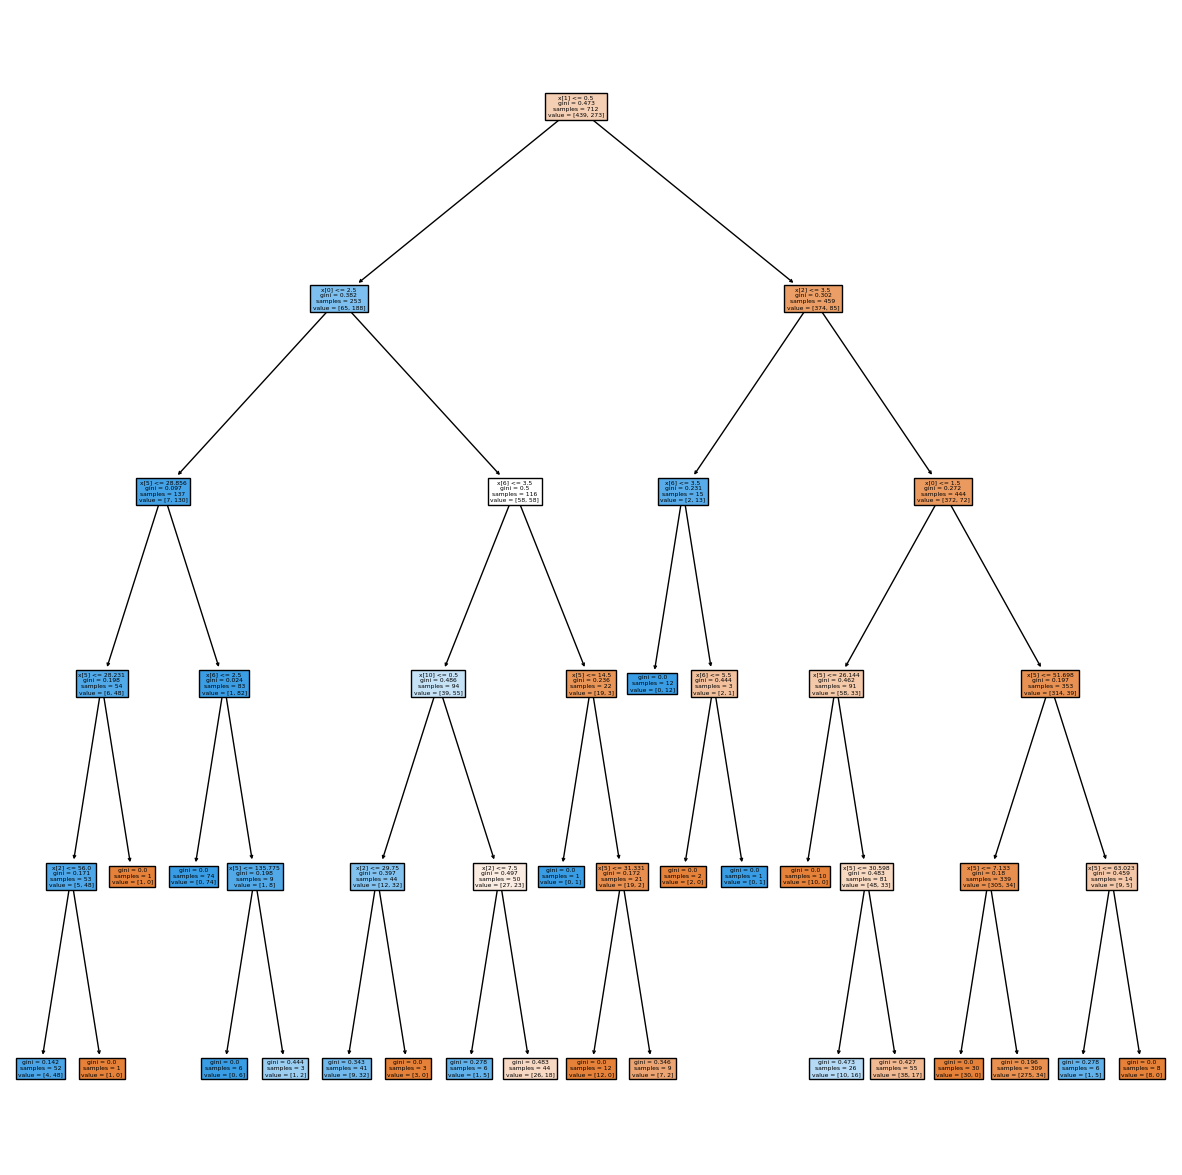

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dt_titanic, filled=True)

In [32]:
dt_titanic.feature_importances_

array([0.18181015, 0.53479236, 0.1126243 , 0.        , 0.        ,
       0.09603769, 0.05712277, 0.        , 0.        , 0.        ,
       0.01761273])

Removendo as colunas que não contribuíram muito para a construção da árvore

In [33]:
f_imp = dt_titanic.feature_importances_

In [34]:
for i, col in enumerate(titanic_train.columns.values[1:]):
  if f_imp[i] <= 0.01:
    titanic_train.drop(col, inplace = True, axis=1)

In [35]:
titanic_train

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_S
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,1,1
2,1,1,0,38.0,71.2833,1,0
3,1,3,0,26.0,7.9250,0,1
4,1,1,0,35.0,53.1000,1,1
5,0,3,1,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,0,1
888,1,1,0,19.0,30.0000,0,1
889,0,3,0,28.0,23.4500,3,1


Treinando o modelo apenas com as colunas que sobraram

In [36]:
X_train, X_val, y_train, y_val = train_test_split(titanic_train.values[:,1:], titanic_train.values[:,0], test_size=0.2, stratify=titanic_train.values[:,0], random_state=42)

In [37]:
dt_titanic = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt_titanic.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Podemos perceber que os valores das métricas foram bem parecidos, pois removemos apenas as colunas que não contribuiram em nada para a construção da árvore

In [38]:
y_pred = dt_titanic.predict(X_val)
accuracy_score(y_val, y_pred)

0.7653631284916201

In [39]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       110
         1.0       0.75      0.58      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



Também podemos perceber que a árvore permaneceu igual

[Text(0.4868421052631579, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.28289473684210525, 0.75, 'x[0] <= 2.5\ngini = 0.382\nsamples = 253\nvalue = [65, 188]'),
 Text(0.13157894736842105, 0.5833333333333334, 'x[3] <= 28.856\ngini = 0.097\nsamples = 137\nvalue = [7, 130]'),
 Text(0.07894736842105263, 0.4166666666666667, 'x[3] <= 28.231\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(0.05263157894736842, 0.25, 'x[2] <= 56.0\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(0.02631578947368421, 0.08333333333333333, 'gini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10526315789473684, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18421052631578946, 0.4166666666666667, 'x[4] <= 2.5\ngini = 0.024\nsamples = 83\nvalue = [1, 82]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(0.2105263157894

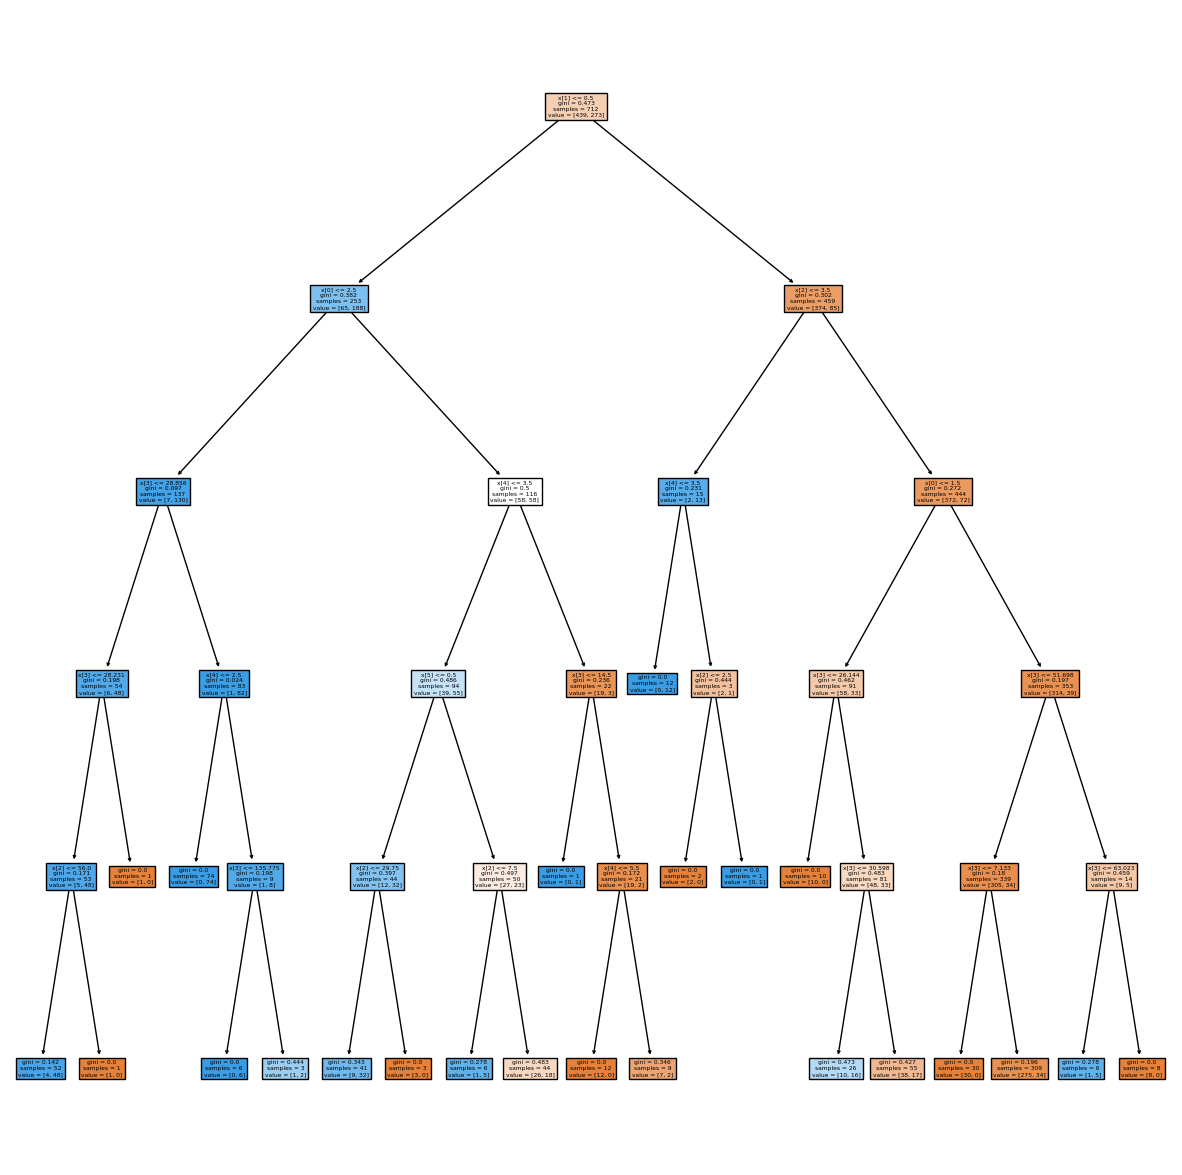

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dt_titanic, filled=True)

In [41]:
titanic_test = pd.read_csv('test.csv', index_col = 0)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Tudo que foi feito com os dados de treino precisa ser feito com os dados de teste

In [42]:
titanic_test['Family'] = titanic_test.Parch + titanic_test.SibSp
titanic_test['Is_Alone'] = titanic_test.Family == 0
titanic_test.Embarked.fillna(titanic_test.Embarked.mode()[0], inplace = True)
titanic_test.Cabin = titanic_test.Cabin.fillna('NA')
grp_age = titanic_test.groupby(['Sex', 'Pclass'])
grp_age.Age.apply(lambda x: x.fillna(x.median()))
titanic_test.Age.fillna(titanic_test.Age.median(), inplace = True)
from sklearn.preprocessing import LabelEncoder
titanic_test['Sex'] = LabelEncoder().fit_transform(titanic_test['Sex'])
titanic_test['Is_Alone'] = LabelEncoder().fit_transform(titanic_test['Is_Alone'])
titanic_test = pd.get_dummies(titanic_test, columns=['Embarked'])
titanic_test.drop(['Cabin','Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-42-9886d3581936>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grp_age.Age.apply(lambda x: x.fillna(x.median()))


In [43]:
for i, col in enumerate(titanic_test.columns.values):
  if f_imp[i] <= 0.01:
    titanic_test.drop(col, inplace = True, axis=1)

In [44]:
titanic_test

,Pclass,Sex,Age,Fare,Family,Embarked_S
PassengerId,,,,,,
892,3,1,34.5,7.8292,0,0
893,3,0,47.0,7.0000,1,1
894,2,1,62.0,9.6875,0,0
895,3,1,27.0,8.6625,0,1
896,3,0,22.0,12.2875,2,1
...,...,...,...,...,...,...
1305,3,1,27.0,8.0500,0,1
1306,1,0,39.0,108.9000,0,0
1307,3,1,38.5,7.2500,0,1


  Verificando valores faltantes

In [45]:
titanic_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          1
Family        0
Embarked_S    0
dtype: int64

Preenchendo um valor faltante da coluna Fare

In [46]:
grp_fare = titanic_test.groupby(['Pclass'])
grp_fare.Fare.apply(lambda x: x.fillna(x.median()))
titanic_test.Fare.fillna(titanic_test.Fare.median(), inplace = True)

<ipython-input-46-1b2341bbc6f6>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grp_fare.Fare.apply(lambda x: x.fillna(x.median()))


Criando o arquivo csv com as predições

In [47]:
y_pred = dt_titanic.predict(titanic_test.values)

In [48]:
predicoes = pd.DataFrame(index=titanic_test.index.values)

In [49]:
predicoes.index.name = 'PassengerId'

In [50]:
predicoes

""
PassengerId
892
893
894
895
896
...
1305
1306
1307


In [51]:
predicoes.insert(0, 'Survived', 0)
for i, v in enumerate(y_pred):
  predicoes['Survived'].iloc[i] = v

In [52]:
predicoes

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [53]:
predicoes.to_csv('resultado.csv')

Submetendo o arquivo csv na plataforma Kaggle, obtemos uma acurácia de 0.76555

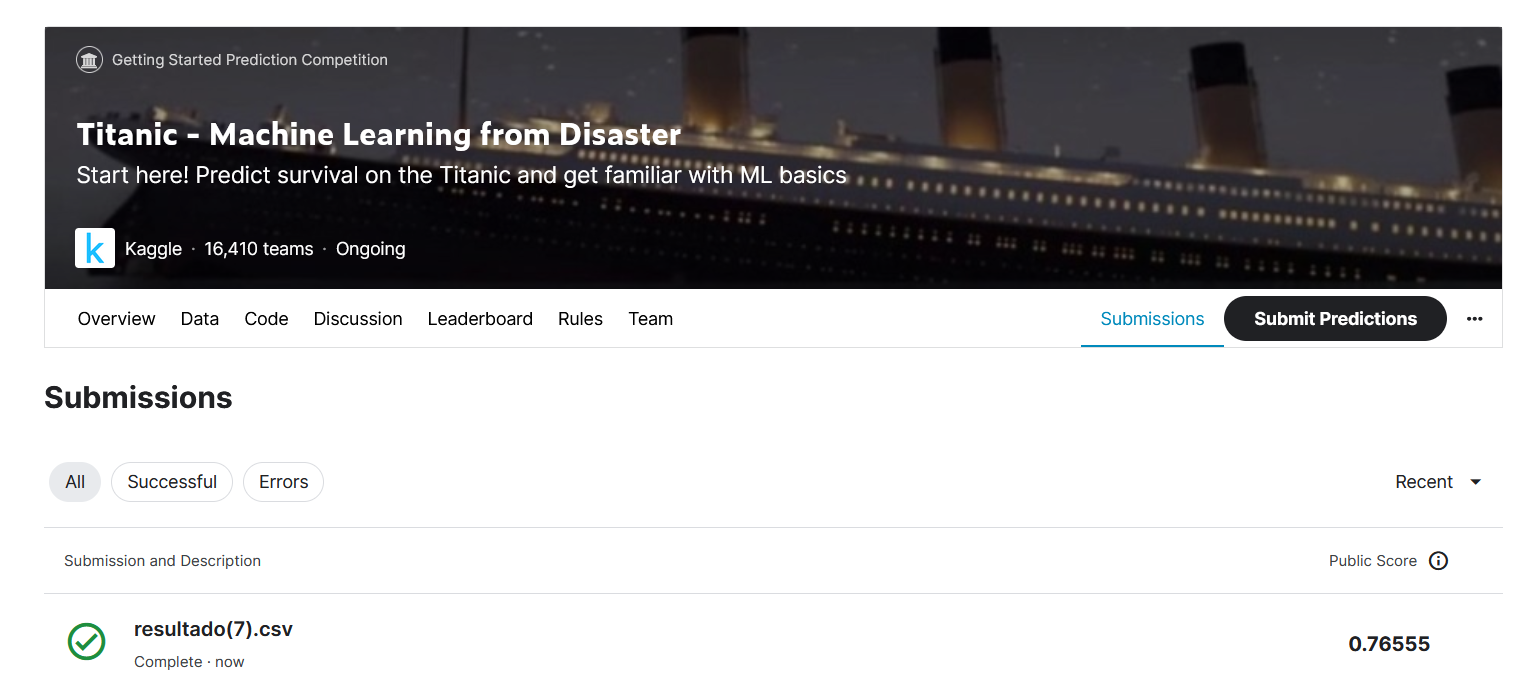

In [54]:
from IPython.display import Image
Image('/content/Kaggle Titanic.png')